In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
input_folder = r'E:\Drone Dataset\dataset\semantic_drone_dataset\EdgeImage'
output_folder_canny = r'E:\Drone Dataset\dataset\semantic_drone_dataset\canny_output'
output_folder_prewitt = r'E:\Drone Dataset\dataset\semantic_drone_dataset\prewitt_output'
output_folder_sobel = r'E:\Drone Dataset\dataset\semantic_drone_dataset\sobel_output'

# Create output folders if they don't exist
for folder in [output_folder_canny, output_folder_prewitt, output_folder_sobel]:
    if not os.path.exists(folder):
        os.makedirs(folder)


In [7]:
def canny_edge_detection(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, 100, 200)
    return edges

def prewitt_edge_detection(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Prewitt edge detection
    kernel_x = np.array([[1, 0, -1],
                         [1, 0, -1],
                         [1, 0, -1]])
    kernel_y = np.array([[1, 1, 1],
                         [0, 0, 0],
                         [-1, -1, -1]])
    edges_x = cv2.filter2D(gray_image, -1, kernel_x)
    edges_y = cv2.filter2D(gray_image, -1, kernel_y)
    edges = np.sqrt(np.square(edges_x) + np.square(edges_y))
    
    return edges.astype(np.uint8)

def sobel_edge_detection(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Sobel edge detection
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    edges = np.sqrt(np.square(sobel_x) + np.square(sobel_y))
    
    return edges.astype(np.uint8)

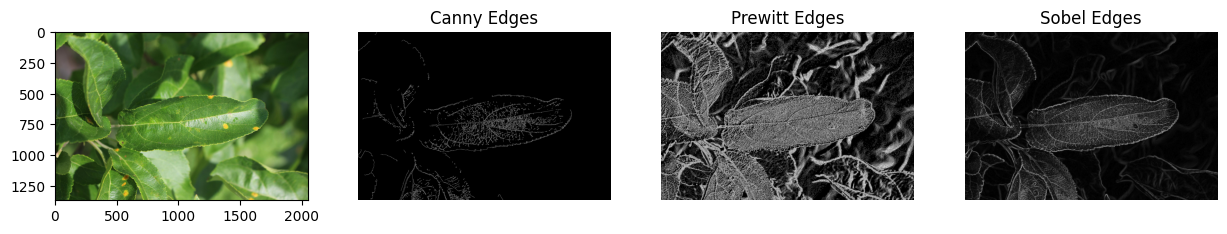

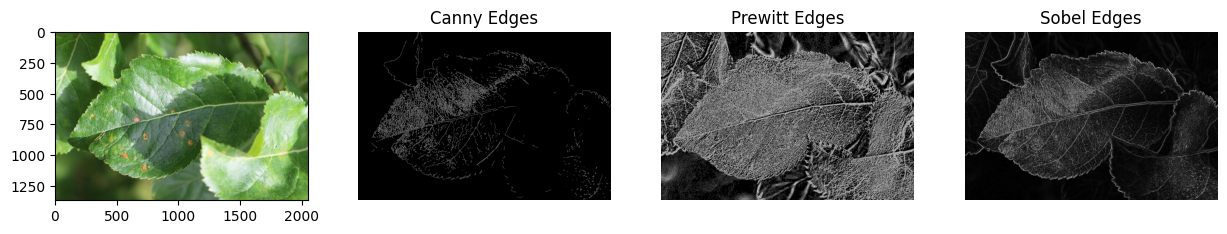

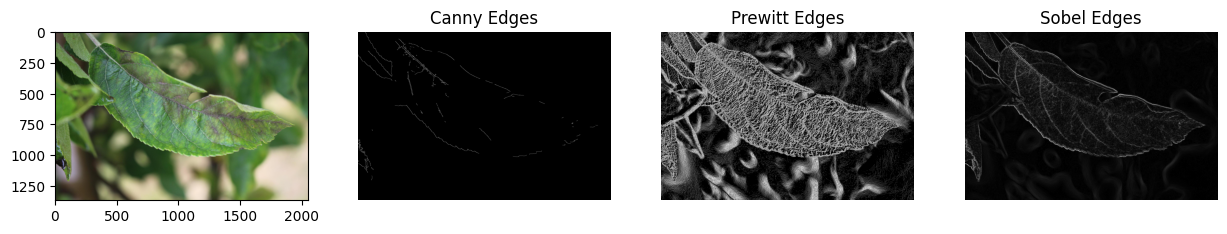

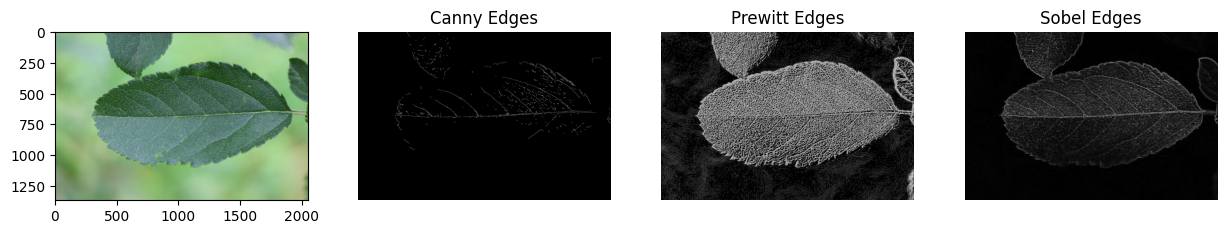

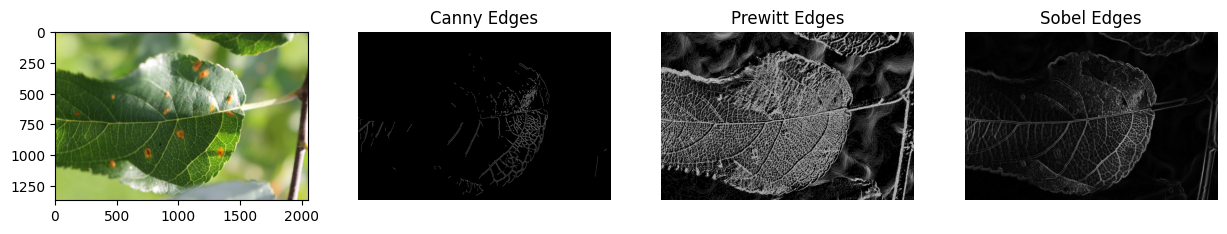

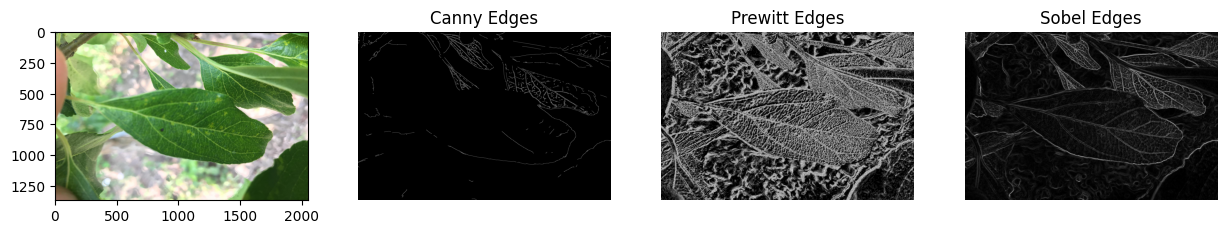

In [9]:
# Process images
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Read the image
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)
        # Apply edge detection algorithms
        canny_edges = canny_edge_detection(image)
        prewitt_edges = prewitt_edge_detection(image)
        sobel_edges = sobel_edge_detection(image)
        # Save output images
        cv2.imwrite(os.path.join(output_folder_canny, filename), canny_edges)
        cv2.imwrite(os.path.join(output_folder_prewitt, filename), prewitt_edges)
        cv2.imwrite(os.path.join(output_folder_sobel, filename), sobel_edges)
        # Plot images
        plt.figure(figsize=(15, 5))
        # Plot original image
        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        # Plot Canny edges
        plt.subplot(1, 4, 2)
        plt.imshow(canny_edges, cmap='gray')
        plt.title('Canny Edges');plt.axis('off')
        # Plot Prewitt edges
        plt.subplot(1, 4, 3)
        plt.imshow(prewitt_edges, cmap='gray')
        plt.title('Prewitt Edges');plt.axis('off')
        # Plot Sobel edges
        plt.subplot(1, 4, 4)
        plt.imshow(sobel_edges, cmap='gray')
        plt.title('Sobel Edges');plt.axis('off')
        plt.show()
